In [0]:
# !pip install datadotworld
# !pip install datadotworld[pandas]

In [0]:
# !dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import datadotworld as dw

In [0]:
# drive.mount("/content/drive")

In [7]:
ls

drive/  sample_data/


In [8]:
cd "drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [9]:
ls

HelloGithub.ipynb  LICENSE  matrix_shoes/  README.md


In [10]:
cd "matrix_shoes/"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_shoes


In [11]:
ls

matrix_03.ipynb


In [0]:
!mkdir data

In [13]:
ls

data/  matrix_03.ipynb


In [0]:
# we can't have 
!echo 'data' > .gitignore

In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [17]:
type(data)

datadotworld.models.dataset.LocalDataset

In [18]:
data.dataframes

LazyLoadedDict({'7004_1': LazyLoadedValue(<pandas.DataFrame>)})

In [19]:
df = data.dataframes['7004_1']
df.shape

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


(19387, 48)

In [20]:
df.head()

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,NaN,NaN,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,true,NaN,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",NaN,https://i5.walmartimages.com/asr/13ac3d61-003c...,NaN,"josmo/8190wnavy75,699302044036,0699302044036",NaN,8190-W-NAVY-7.5,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""name"":""...","Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,NaN,NaN,new,NaN,USD,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,NaN,false,UnbeatableSale - Walmart.com,REDUCED USD 12.10,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,699302044036,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,NaN,false,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:57Z""],""name"":""...",Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,NaN,NaN,new,NaN,USD,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,NaN,false,SIM Supply Inc - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-5844/...,NaN,servusbyhoneywell/zsr101blmlg,NaN,ZSR101BLMLG,"[{""dateSeen"":[""2016-06-14T04:29:5

In [21]:
# Columns in data.
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [22]:
# Unique types of currency.
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [23]:
# Count of each currency.
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
New with box                                              3
new                                                       3
PalmBeach Jewelry - Walmart.com                           3
UnbeatableSale.com, Inc. - Walmart.com                    3
Wholesale Costume and Party Supplies - Walmart.com        2
New without tags                                          1
SHOEBACCA LTD. - Walmart.com                              1
Shoes.com                                                 1
Name: prices_currency, dtype: int64

In [24]:
# Percentage of currency.
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
New with box                                          0.000155
new                                                   0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
UnbeatableSale.com, Inc. - Walmart.com                0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
New without tags                                      0.000052
SHOEBACCA LTD. - Walmart.com                          0.000052
Shoes.com                                             0.000052
Name: prices_currency, dtype: float64

In [25]:
# Keeping record with only USD currency.
df_usd = df[df['prices_currency'] == 'USD'].copy()
df_usd.prices_currency.value_counts()

USD    18524
Name: prices_currency, dtype: int64

In [26]:
# How many rows we removed when we kept only USD currency.
df.shape[0] - df_usd.shape[0]

863

In [27]:
# Visualizing price range.
# for prices_amountmin.

# checking type of prices_amountmin.

df_usd.prices_amountmin.head(1)

0    39.89
Name: prices_amountmin, dtype: object

In [28]:
# dtype - object.
# assign stype to float.

df_usd.prices_amountmin = df_usd.prices_amountmin.astype(np.float)
df_usd.prices_amountmin.head(1)

0    39.89
Name: prices_amountmin, dtype: float64

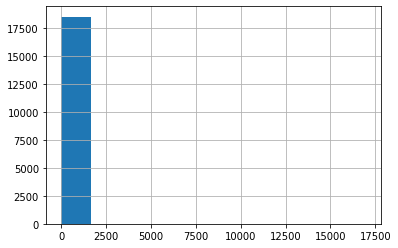

In [29]:
# dtype is float.
# plot historgram for prices_amountmin.

df_usd.prices_amountmin.hist()

In [30]:
# Outlier - wartosci/obserwacje odstajace.
# Outliers are at x axis 15-17k.

# Removing outliers.

np.percentile(df_usd.prices_amountmin,99)

895.0

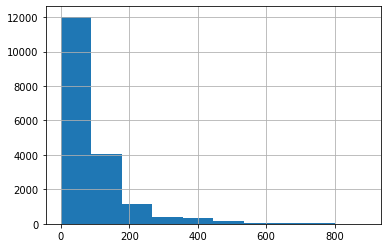

In [31]:
# 895 means that in 99% cases shoes cost 895 USD or less.

# We want to filer out all shoes that are more expensive than 895 USD.
filter_max_price = np.percentile(df_usd.prices_amountmin,99)
df_usd_filter = df_usd[df_usd.prices_amountmin < filter_max_price]

# Plot histogram after removing the outliers
df_usd_filter.prices_amountmin.hist()

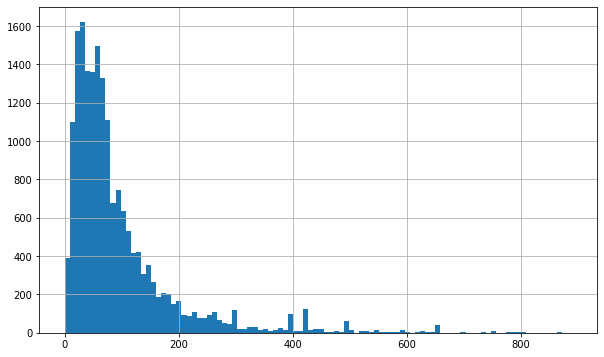

In [32]:
# Plotting histogram with more bins

df_usd_filter.prices_amountmin.hist(bins=100, figsize=(10,6))

In [0]:
# Histogram explanation:
# x-axis: shoes price 0-895
# y-axis: how many shoes are in certain price bin

# Bins explanation:
# bins=100 - x-axis is split (895/100) ~ (900/100)
# so we have steps / bins : 0-9, 9-18, 18-27...

# Here we can see "long tail"

In [40]:
ls

data/  matrix_03.ipynb


In [0]:
# Saving data to .csv file to "data" folder
# Saving raw data - df

df.to_csv('data/shoes_prices.csv', index=False)

In [41]:
cd ..

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [42]:
ls matrix_shoes/

data/  matrix_03.ipynb


In [43]:
pwd

'/content/drive/My Drive/Colab Notebooks/dw_matrix'

In [0]:
# matrix_one --> matrix_shoes
# day3.ipnyb --> matrix_03.ipnyb

# Git add matrix_03.ipnyb

!git add matrix_shoes/matrix_03.ipynb

In [45]:
# Commiting matrix_03.ipnyb

!git commit -m "Men's Shoe Prices dataset from data.world"

[master 1ea61a7] Men's Shoe Prices dataset from data.world
 1 file changed, 1 insertion(+)
 create mode 100644 matrix_shoes/matrix_03.ipynb


In [0]:
# Config
# !git config --global user.email "e-mail"
# !git config --global user.name "name"

In [46]:
! git push -u origin master

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 23.79 KiB | 3.96 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/JBalcony/dw_matrix.git
   89530f2..1ea61a7  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
